# Taurus Column density map

In [47]:
import aplpy
from astropy.io import fits
%pylab inline
#plt.style.use(['dark_background'])

Populating the interactive namespace from numpy and matplotlib


In [48]:
from pywavan import fan_trans, apodize, padding, depad, powspec, gauss_beam

INFO: Auto-setting vmin to -6.680e+20 [aplpy.core]
INFO: Auto-setting vmax to  1.399e+22 [aplpy.core]


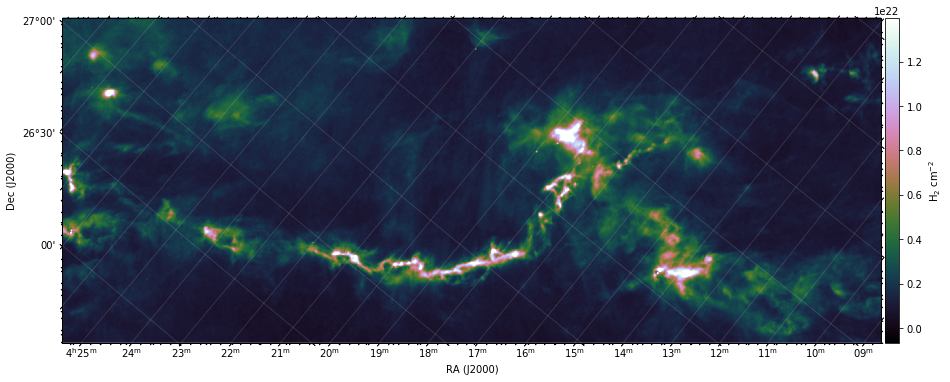

In [3]:
#Read map
plt.figure(1, figsize=(15,15))
figfile = '/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_taurus_L1495_column_density_map_rot40deg_cut.fits'
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

fig_all = plt.figure(1, figsize=(30,15))
fig = aplpy.FITSFigure(figfile,figure=fig_all)
fig.show_colorscale(cmap='cubehelix')
fig.tick_labels.set_xformat('hh:mm')
fig.tick_labels.set_yformat('dd:mm')
fig.ticks.set_xspacing(0.25)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.add_grid()
fig.grid.set_alpha(0.15)
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

### Bin

In [55]:
newdims = np.array([im.shape[0]*rcd/r500,im.shape[1]*rcd/r500])
imbin = congrid(im, newdims, method='neighbour', centre=False, minusone=False)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

### Calculate the Fourier power spectrum

Text(0,0.5,'$P(k)$ $\\sigma$(H$_2$ cm$^{-2}$)$^2$')

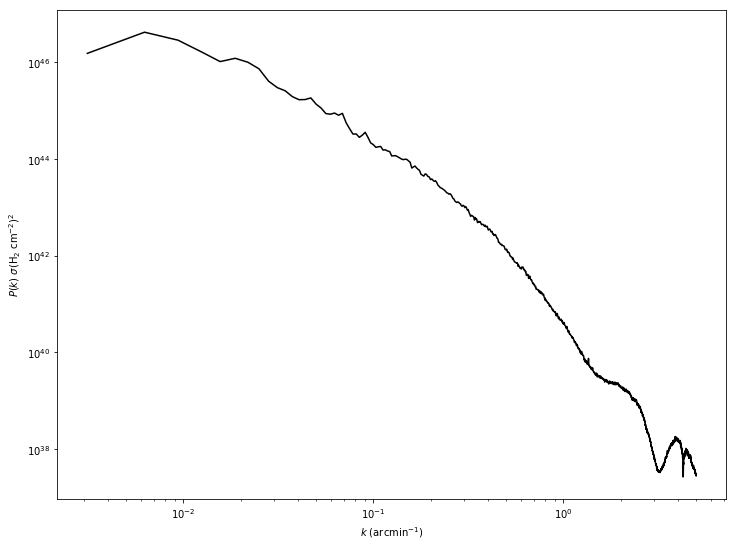

In [21]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

na = im.shape[1]
nb = im.shape[0]
imzm = im - np.mean(im)

#Apodization

tapper = apodize(nb,na,0.98)
imt = imzm *tapper
imr = padding(imt,3200,3200)

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

#Beam Power spectrum
FWHM = 18.2 / (60.*reso)  #Beam size at 250 micron
beam = gauss_beam(FWHM,im.shape[0],im.shape[1],FWHM=True)
beam = gauss_beam(FWHM,3200,3200,FWHM=True)
tab_k, spec_beam = powspec(beam, reso=reso)
spec_beamn = spec_beam/spec_beam[0]  #Spectrum normalisation

plt.figure(figsize=(12,9))
plt.plot(tab_k, spec_k, color='black',label='Total', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ (arcmin$^{-1}$)")
plt.ylabel(r"$P(k)$ $\sigma$(H$_2$ cm$^{-2}$)$^2$")

### Calculate the autocorrelation function

Text(0,0.5,'$R(\\delta r)$')

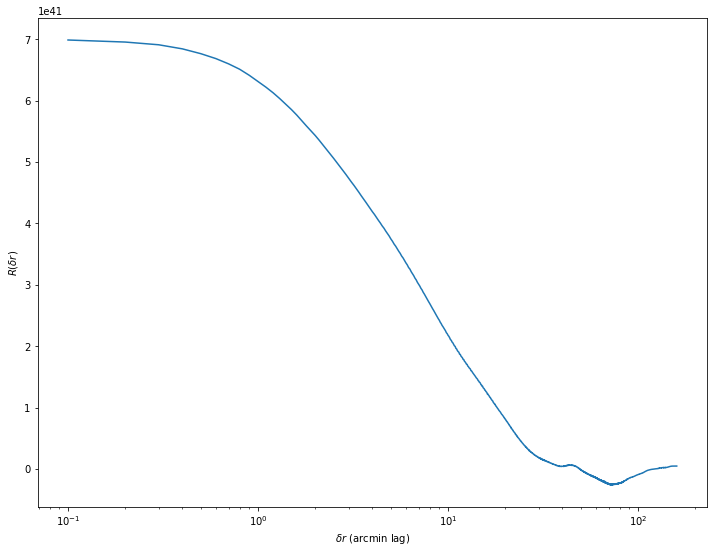

In [23]:
lag,Sr = powspec(imr, reso=reso, autocorr= True)

plt.figure(figsize=(12,9))
plt.plot(lag,Sr)
plt.xscale('log')
plt.xlabel(r'$\delta r$ (arcmin lag)')
plt.ylabel(r'$R(\delta r)$')